In [11]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

from sklearn import datasets, neighbors
from sklearn.model_selection import TimeSeriesSplit
import pickle
import scipy
import time
# =============================================================================================

In [12]:
#Function to pickle in an object.
def openPickleFile(name): #name = the pickle file name, this should be passed as a string inside " ".
    global temp
    temp = pickle.load(open(name + ".pickle","rb"))
    return temp

In [13]:
openPickleFile("y_train")
y_train = temp
print(y_train.shape)
print(y_train.dtype)

(33334,)
object


In [14]:
y_train[y_train == 'positive'] = 1
y_train[y_train == 'negative'] = 0
y_train = y_train.astype(float)
print(y_train.dtype)

float64


In [15]:
openPickleFile("y_test")
y_test = temp
print(y_test.shape)
print(y_test.dtype)

(16666,)
object


In [16]:
y_test[y_test == 'positive'] = 1
y_test[y_test == 'negative'] = 0
y_test = y_test.astype(float)
print(y_test.dtype)

float64


In [17]:
#Function to count no. of unique values in variable of any datatype.
def unique_count(a):
    unique, inverse = np.unique(a, return_inverse=True)
    count = np.zeros(len(unique), np.int)
    np.add.at(count, inverse, 1)
    return np.vstack(( unique, count)).T

unique_count(y_train)

array([[0.0000e+00, 4.9490e+03],
       [1.0000e+00, 2.8385e+04]])

#  CV using brute force algorithm

# 1. CV on TSNE data for Unigrams

In [22]:
openPickleFile("X_train_BOW_unigram_tsne")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ 12.46622326  26.68865382]
 [  1.17547167  -1.30889228]
 [ -5.1770876  -31.8098705 ]
 ...
 [  0.64622451  -3.06533227]
 [  0.24541933 -45.5613387 ]
 [ -0.64599662 -47.17865137]]


In [23]:
openPickleFile("X_test_BOW_unigram_tsne")
X_test = temp
print(X_test.shape)
print(X_test)

(16666, 2)
[[-18.59322819   4.86198982]
 [-18.75219032  13.55477536]
 [-13.0023866   -0.40266338]
 ...
 [-11.19247968  -2.11470198]
 [ 26.50356308 -40.52768428]
 [ 33.4091974    6.10837994]]


In [24]:
def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T

unique(y_train)

array([[0.0000e+00, 4.9490e+03],
       [1.0000e+00, 2.8385e+04]])

In [25]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 77%

CV accuracy for k = 3 is 82%

CV accuracy for k = 5 is 83%

CV accuracy for k = 7 is 84%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 72%
CV for k in range(1,30,2) done! Time elapsed: 167.70819854736328 seconds


### 10 fold cross validation 


The optimal number of neighbors is 27.


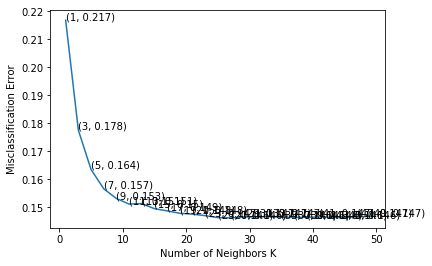

the misclassification error for each k value is :  [0.217 0.178 0.164 0.157 0.153 0.151 0.151 0.15  0.149 0.148 0.148 0.147
 0.146 0.146 0.147 0.147 0.147 0.146 0.146 0.146 0.147 0.146 0.146 0.147
 0.147]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 1376.116530418396 seconds


In [26]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [27]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='brute', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 27 is 81.399256%
 CV for optimal k on Test data done! Time elapsed: 27.018742322921753 seconds


# 2. CV on TSNE data of Bigrams

In [28]:
openPickleFile("X_train_BOW_bigram_tsne")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ 22.667371   -13.87228896]
 [  4.79317407  -6.40870396]
 [ -1.39810703 -40.15319331]
 ...
 [  5.64008344  -8.01493589]
 [  4.06429635 -42.74992263]
 [  0.84614955 -42.09851174]]


In [29]:
openPickleFile("X_test_BOW_bigram_tsne")
X_test = temp
print(X_test.shape)
print(X_test)

(16666, 2)
[[-18.18187498  -5.11136383]
 [-18.25962647  14.63319435]
 [  6.95168296  -0.37124685]
 ...
 [ -1.43422316  -1.92870666]
 [ 48.2896976    1.5626412 ]
 [ 33.74972866  -3.9209257 ]]


In [30]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 79%

CV accuracy for k = 3 is 82%

CV accuracy for k = 5 is 84%

CV accuracy for k = 7 is 84%

CV accuracy for k = 9 is 84%

CV accuracy for k = 11 is 84%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 73%
CV for k in range(1,30,2) done! Time elapsed: 170.66497898101807 seconds


### 10 fold cross validation 


The optimal number of neighbors is 31.


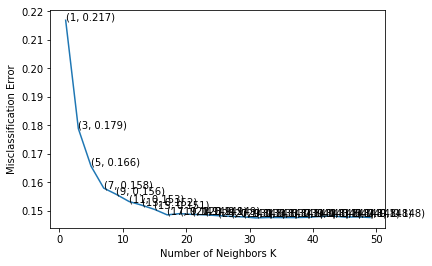

the misclassification error for each k value is :  [0.217 0.179 0.166 0.158 0.156 0.153 0.152 0.151 0.149 0.149 0.149 0.149
 0.148 0.148 0.148 0.148 0.148 0.148 0.148 0.148 0.148 0.148 0.148 0.148
 0.148]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 1372.628217458725 seconds


In [31]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [32]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='brute', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 31 is 81.273251%
 CV for optimal k on Test data done! Time elapsed: 25.94264245033264 seconds


# 3. CV on TSNE data for TF-IDF

In [33]:
openPickleFile("X_train_tf_idf_tsne")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ -6.09953507   6.72497237]
 [-33.4692973  -20.47437808]
 [ -1.84562687  -2.5333012 ]
 ...
 [ 17.30156288  -1.01735313]
 [ 38.11994295 -19.71465405]
 [ -3.47598292  -7.55473966]]


In [34]:
openPickleFile("X_test_tf_idf_tsne")
X_test = temp
print(X_test.shape)
print(X_test)

(16666, 2)
[[ 22.74610807   7.44128863]
 [-43.82154621   1.21223035]
 [ -3.49087469   8.19165554]
 ...
 [ 15.0469712   28.40037018]
 [ 24.41162959 -36.63058084]
 [-13.13293783 -15.41747164]]


In [35]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 78%

CV accuracy for k = 3 is 82%

CV accuracy for k = 5 is 83%

CV accuracy for k = 7 is 84%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 72%
CV for k in range(1,30,2) done! Time elapsed: 168.44380474090576 seconds


### 10 fold cross validation 


The optimal number of neighbors is 23.


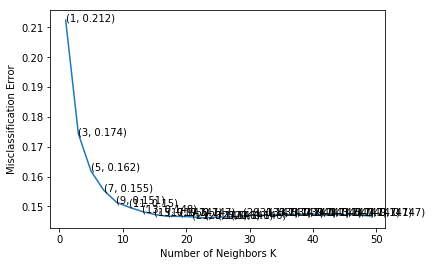

the misclassification error for each k value is :  [0.212 0.174 0.162 0.155 0.151 0.15  0.148 0.147 0.147 0.147 0.146 0.146
 0.146 0.146 0.147 0.147 0.147 0.147 0.147 0.147 0.147 0.147 0.147 0.147
 0.147]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 1329.5150651931763 seconds


In [36]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [37]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='brute', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 23 is 81.141246%
 CV for optimal k on Test data done! Time elapsed: 25.459946870803833 seconds


# 4. CV on TSNE data for Avg w2v

In [38]:
openPickleFile("X_train_sent_vectors_tsne")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ -5.18932776 -19.85113463]
 [-19.38656338 -19.90727633]
 [-20.17817352 -19.47306158]
 ...
 [ -0.39182819   4.35762239]
 [-21.10855306  -4.28585356]
 [-20.65119548  -3.79581033]]


In [39]:
openPickleFile("X_test_sent_vectors_tsne")
X_test = temp
print(X_test.shape)
print(X_test)

(16666, 2)
[[-13.73571403 -40.59557589]
 [-13.35715831  -6.98219984]
 [ 18.66979195  10.00943354]
 ...
 [ 37.13265298   1.38713025]
 [ 12.27440414  -2.95131322]
 [ 25.76617651  34.75142092]]


In [40]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 81%

CV accuracy for k = 3 is 84%

CV accuracy for k = 5 is 85%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 86%

CV accuracy for k = 15 is 86%

CV accuracy for k = 17 is 86%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 86%

CV accuracy for k = 29 is 86%

****Test accuracy for k = 1 is 72%
CV for k in range(1,30,2) done! Time elapsed: 164.55514669418335 seconds


### 10 fold cross validation 


The optimal number of neighbors is 29.


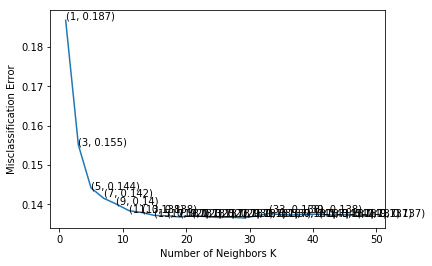

the misclassification error for each k value is :  [0.187 0.155 0.144 0.142 0.14  0.138 0.138 0.137 0.137 0.137 0.137 0.137
 0.137 0.137 0.137 0.137 0.138 0.137 0.137 0.138 0.137 0.137 0.137 0.137
 0.137]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 1413.5281929969788 seconds


In [41]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [42]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='brute', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 29 is 80.031201%
 CV for optimal k on Test data done! Time elapsed: 28.255224227905273 seconds


# 5. CV on TSNE data for TF-IDF Avg W2V

In [43]:
openPickleFile("X_train_tfidf_sent_vectors_TSNE")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ 51.00725692  29.94390113]
 [-15.98265073 -10.0386827 ]
 [-16.32168028  -9.79519485]
 ...
 [-27.39748169   0.14538634]
 [-12.5409894   26.0431301 ]
 [-15.2099629   23.31137254]]


In [44]:
openPickleFile("X_test_tfidf_sent_vectors_TSNE")
X_test = temp
print(X_test.shape)
print(X_test)

(16666, 2)
[[-16.72650871 -39.30089726]
 [ 32.90438352   2.5288741 ]
 [ 13.51396017   3.30621746]
 ...
 [ 40.99771103   2.33425794]
 [ 19.12431187  17.84766515]
 [ 18.75914353  24.28219935]]


In [45]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 79%

CV accuracy for k = 3 is 83%

CV accuracy for k = 5 is 84%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 73%
CV for k in range(1,30,2) done! Time elapsed: 183.7907087802887 seconds


### 10 fold cross validation 


The optimal number of neighbors is 21.


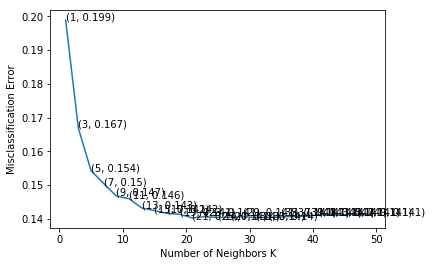

the misclassification error for each k value is :  [0.199 0.167 0.154 0.15  0.147 0.146 0.143 0.142 0.142 0.141 0.14  0.141
 0.14  0.14  0.141 0.14  0.14  0.141 0.141 0.141 0.141 0.141 0.141 0.141
 0.141]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 1411.78635597229 seconds


In [46]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [47]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='brute', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 21 is 79.989200%
 CV for optimal k on Test data done! Time elapsed: 27.705902814865112 seconds
